# Fundamentos da WiSARD

Projeto de graduação para a disciplina de Redes Neurais sem Peso.

## Conceitos Básicos

- Retina : é o nosso material de input, que é uma matriz, de valores binários. Podemos entender a retina como uma imagem, onde cada pixel pode ser preto ou branco.

- Tupla  : um array de tamanho fixo que em cada uma de suas posições possuíra o mesmo valor que um dos pixels da retina. 

- Mapeamento : a retina será partida em M tuplas, onde cada tupla possuirá N pixels representados. Chamamos de mapeamento a associação de um pixel da retina com uma posição em uma das tuplas. Em geral, a WiSARD realiza o mapeamento de forma pseudo-aleatória.

- RAM : cada tupla endereçará 2^N posições. O conjunto dessas posições representa a RAM daquela tupla

- Treinamento : treinar a rede significa receber uma retina, encaminhar o valor dos pixels para suas respectivas tuplas e então, pegar cada uma das tuplas com seus valores binários setados, e setar a respectiva posição na RAM. Por exemplo, imagine uma tupla de valor [1, 1, 0], logo, setaremos a posição 6 na RAM.

- Discriminador : é um conjunto de RAMs treinadas que visa ser capaz de pontuar a semelhança de uma retina com o seu padrão.

In [1]:
import WiSARD as Wi

In [ ]:
test = Wi.WiSARD(4, 4, 2)
test.random_mapping()
test.mapping

In [ ]:
retinas = [
    [[0, 0, 0, 1],
     [0, 0, 0, 1],
     [0, 0, 0, 1],
     [0, 0, 0, 1]],

    [[0, 0, 0, 1],
     [0, 0, 0, 1],
     [0, 0, 0, 1],
     [0, 0, 0, 1]],

    [[0, 0, 0, 1],
     [0, 0, 0, 1],
     [0, 0, 0, 1],
     [0, 0, 0, 1]]

]

test.fit_class("i", retinas)

retinas = [
    [[0, 1, 0, 1],
     [0, 1, 1, 1],
     [0, 1, 0, 1],
     [0, 1, 0, 1]],

    [[1, 0, 1, 0],
     [1, 0, 1, 0],
     [1, 1, 1, 0],
     [1, 0, 1, 0]],

    [[1, 0, 1, 0],
     [1, 1, 1, 0],
     [1, 0, 1, 0],
     [1, 0, 1, 0]]

]

test.fit_class("H", retinas)



In [ ]:
test.classify(
   [[0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1],
    [0, 0, 0, 1]]
)


In [2]:
import keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


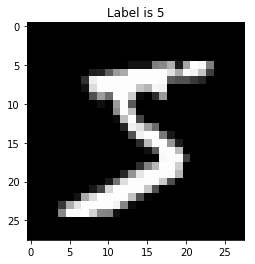

In [3]:
import numpy as np
import matplotlib.pyplot as plt

pixels = x_train[0]
pixels = np.array(pixels, dtype='uint8')
pixels = pixels.reshape((28, 28))
# Plot
plt.title('Label is {label}'.format(label=y_train[0]))
plt.imshow(pixels, cmap='gray')
plt.show()

In [4]:
import utilities

#mnist_wisard = Wi.WiSARD(28, 28, 28)
#mnist_wisard.random_mapping()
train_set = []
for i in range(len(y_train)):
    train_set.append((y_train[i],x_train[i]))

test_set = []
for i in range(len(y_test)):
    test_set.append((y_test[i],x_test[i]))

#k = 40
#for i in range(0, 1000): 
#    mnist_wisard.fit_class( y_train[i], [utilities.filter_image(x_train[i], k)] )

10000


In [6]:
#print("Resultado obtido: " , mnist_wisard.classify(utilities.filter_image(x_test[411], k)))
#print("Resultado esperado: ", y_test[411])
utilities.eval(Wi.WiSARD(28, 28, 28),train_set, 1000, test_set, 40, 1 )

0.8588